### Importing the Libraries

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings

from sklearn import svm
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')

# Set up for inline plotting
%matplotlib inline

### Load dataset

In [111]:
path = "C:\\Users\\Ritik\\Downloads\\DSP_project\\archive\\heart.csv"
heart_data = pd.read_csv(path)
heart_data.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [112]:
# Rename columns for clarity
heart_data.rename(columns={"caa": "ca", 'thalachh': 'thalach', 'restecg': 'rest_ecg'}, inplace=True)


### Dataset overview

In [113]:
# To check the number of rows and columns
print("Dataset Shape:", heart_data.shape)


Dataset Shape: (303, 14)


In [114]:
print("Dataset Info:")
heart_data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest_ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


All our features except oldpeak are of type integer.

In [115]:
# Descriptive Statistics
print("Dataset Description:")
heart_data.describe()

Dataset Description:


,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exng,oldpeak,slp,ca,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [116]:
# showing correlation
corr = heart_data.corr()
corr

,age,sex,cp,trtbps,chol,fbs,rest_ecg,thalach,exng,oldpeak,slp,ca,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
rest_ecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

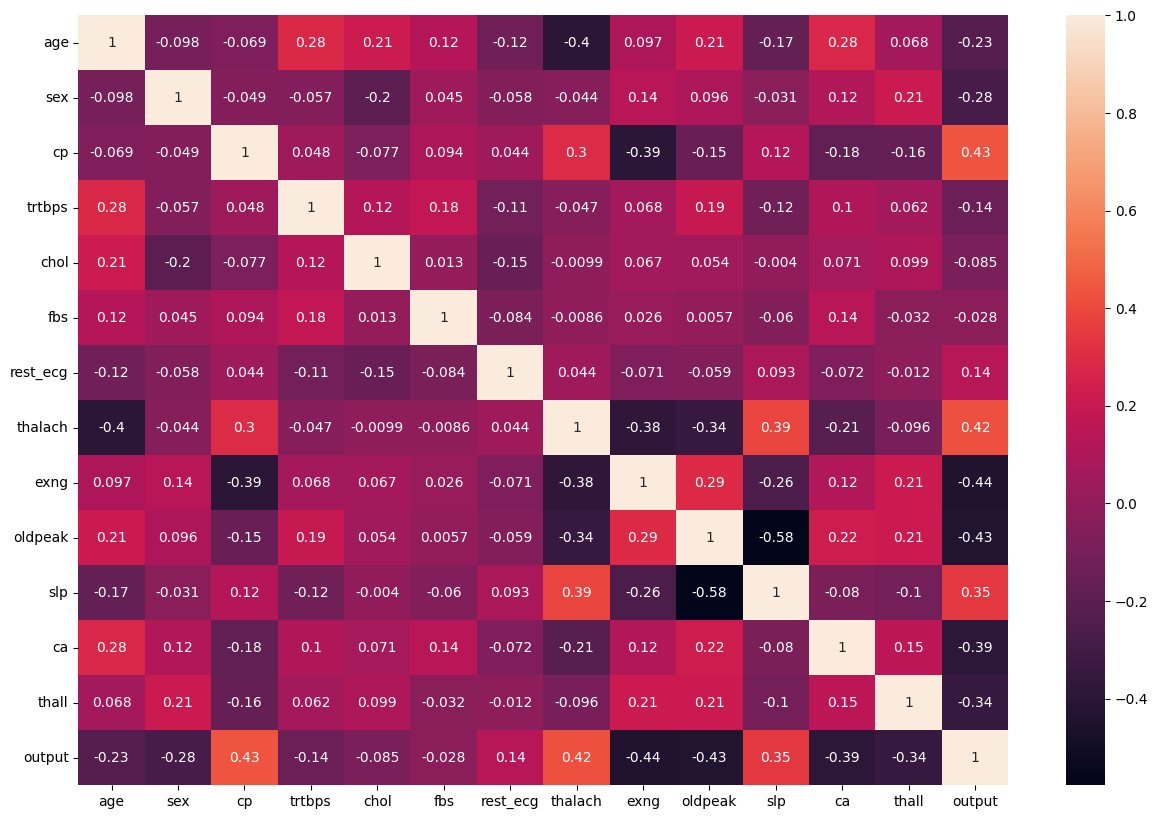

In [117]:
# correlation plot
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            annot=True)

In [118]:
# Value counts for each column
for column in heart_data.columns:
    print(f"------  {column}  ------")
    print(heart_data[column].value_counts())

------  age  ------
age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: count, dtype: int64
------  sex  ------
sex
1    207
0     96
Name: count, dtype: int64
------  cp  ------
cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64
------  trtbps  ------
trtbps
120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1

"In the 'ca' column, we observe the value 4, which is considered noise in this column. Given the small size of our dataset, instead of removing the noise, we attempted to handle the noisy data by replacing the occurrences of 4 with NaN using fillna and subsequently imputing the missing values with the median of the 'ca' column."

In [119]:
# heart_data['ca'] = heart_data['ca'].replace(4, np.NAN)
# heart_data['ca'] = heart_data['ca'].fillna(heart_data['ca'].median())
# print(heart_data['ca'].value_counts())

In [120]:
# Drop duplicates
heart_data = heart_data.drop_duplicates()
print("Shape after dropping duplicates:", heart_data.shape)

Shape after dropping duplicates: (302, 14)


### Missing values

In [121]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
rest_ecg    0
thalach     0
exng        0
oldpeak     0
slp         0
ca          0
thall       0
output      0
dtype: int64

There are no missing values present in our dataset.

In [122]:
# Classifying data into numerical and categorical features.
data_numerical = heart_data[['age','trtbps','chol','thalach','oldpeak']] # not including slope as i don't think its useful
data_categorical = heart_data[['sex','cp','fbs','rest_ecg','exng','ca','thall','output']]


### Numerical Variable Analysis

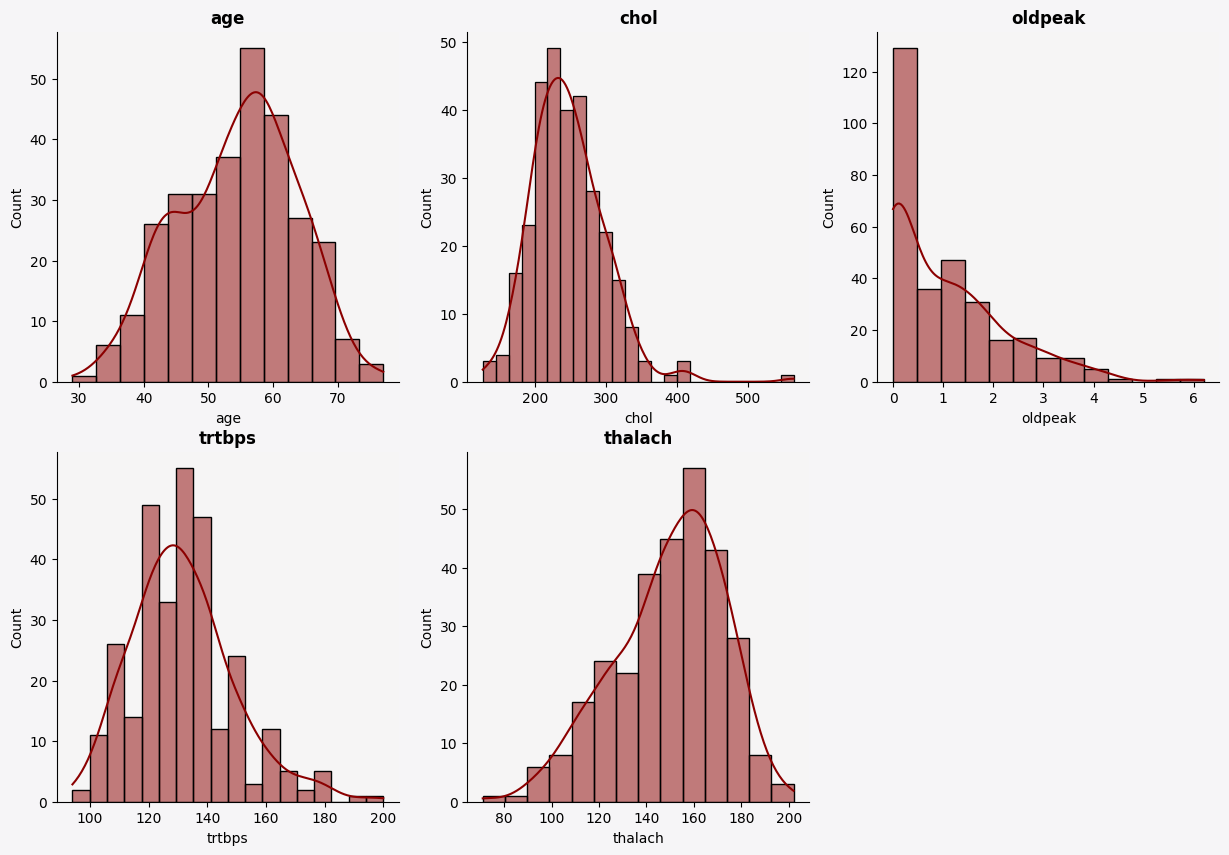

In [123]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10), facecolor='#f6f5f7')

for i, column in enumerate(data_numerical.columns):
    plot_ax = ax[i % 2, i // 2]
    sns.histplot(x=data_numerical[column], color='darkred', kde=True, alpha=0.5, ax=plot_ax)
    
    plot_ax.set_title(column, fontweight='bold')
    plot_ax.set_facecolor('#f6f5f5')
    
    for spine in ["top", "right"]:
        plot_ax.spines[spine].set_visible(False)

# Make the last subplot in the last row invisible
ax[1, 2].set_visible(False)

plt.show()


### Skewness and Kurtosis

In [124]:
s_k=[]
for i in data_numerical.columns:
    s_k.append([i,data_numerical[i].skew(),data_numerical[i].kurt()])
skew_kurt=pd.DataFrame(s_k,columns=['Columns','Skewness','Kurtosis'])
skew_kurt

,Columns,Skewness,Kurtosis
0,age,-0.203743,-0.527512
1,trtbps,0.716541,0.922996
2,chol,1.147332,4.542591
3,thalach,-0.532671,-0.062186
4,oldpeak,1.266173,1.567876


### Analyis of Numerical Variables with Target


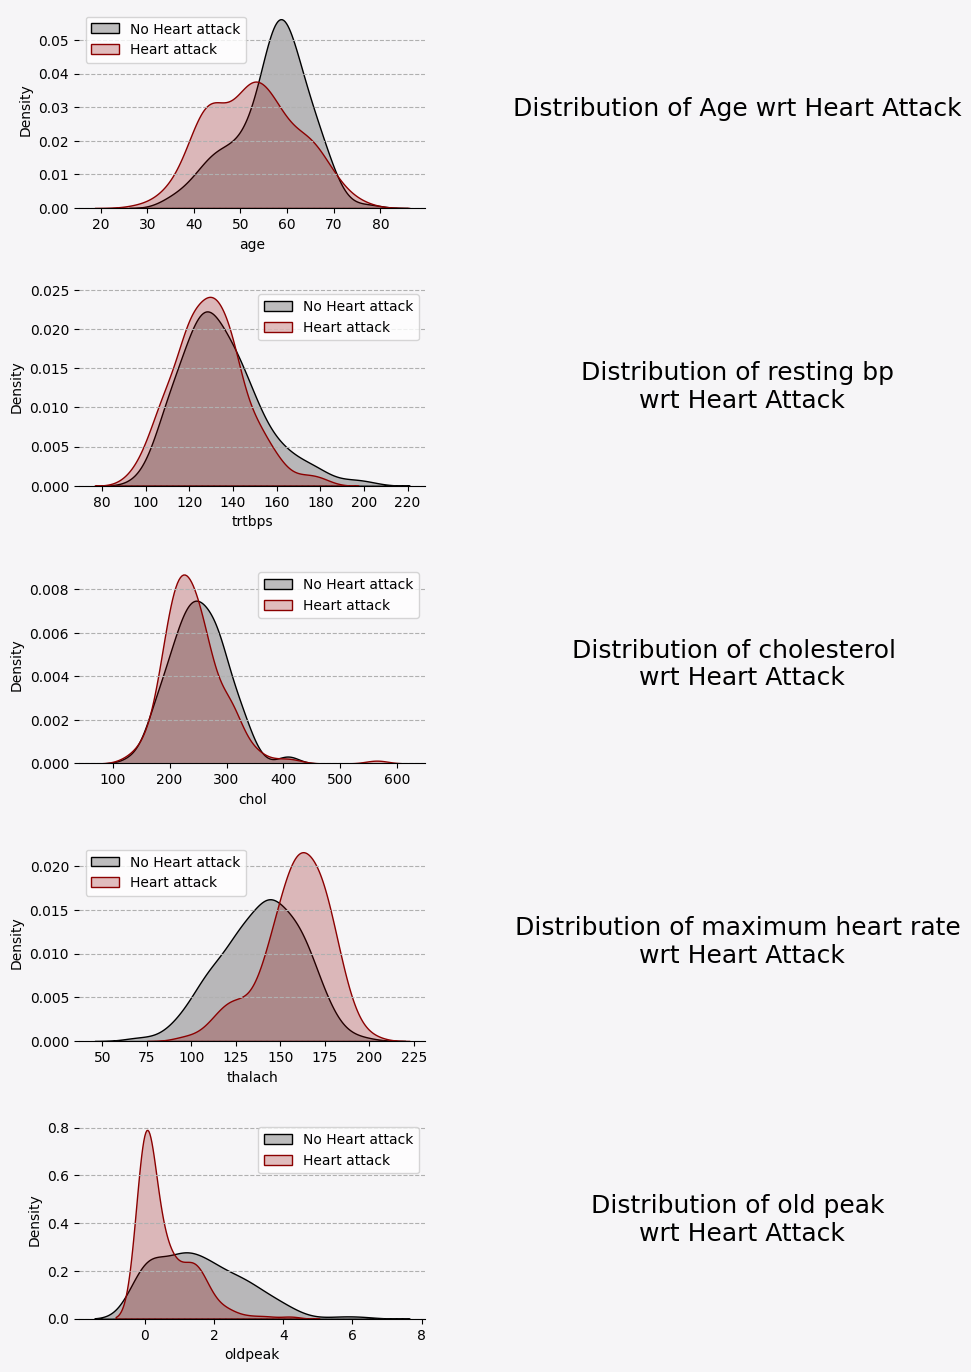

In [125]:
fig = plt.figure(figsize=(17,17))
gs = fig.add_gridspec(5,3)
gs.update(wspace=0.4, hspace=0.4)
# adding figures
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])
axes=[ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]
# data_numerical = data[['age','trestbps','chol','thalach','oldpeak']]
background_color = '#f6f5f7'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color) 

#ax0
sns.kdeplot(ax=ax0,x=heart_data.loc[heart_data['output']==0]['age'],color='black',label='No Heart attack',shade=True)
sns.kdeplot(ax=ax0,x=heart_data.loc[heart_data['output']==1]['age'],color='darkred',label='Heart attack',shade=True)
ax0.legend(loc = 'upper left')
ax0.grid(linestyle='--', axis='y')
#ax1
ax1.text(0.5,0.5,'Distribution of Age wrt Heart Attack',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18)

#ax2
sns.kdeplot(ax=ax2,x=heart_data.loc[heart_data['output']==0]['trtbps'],color='black',label='No Heart attack',shade=True)
sns.kdeplot(ax=ax2,x=heart_data.loc[heart_data['output']==1]['trtbps'],color='darkred',label='Heart attack',shade=True)
ax2.legend(loc = 'upper right')
ax2.grid(linestyle='--', axis='y')
#ax3
ax3.text(0.5,0.5,'Distribution of resting bp\n wrt Heart Attack',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18)

#ax4
sns.kdeplot(ax=ax4,x=heart_data.loc[heart_data['output']==0]['chol'],color='black',label='No Heart attack',shade=True)
sns.kdeplot(ax=ax4,x=heart_data.loc[heart_data['output']==1]['chol'],color='darkred',label='Heart attack',shade=True)
ax4.legend(loc = 'upper right')
ax4.grid(linestyle='--', axis='y')
#ax5
ax5.text(0.5,0.5,'Distribution of cholesterol \n wrt Heart Attack',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18)

#ax6
sns.kdeplot(ax=ax6,x=heart_data.loc[heart_data['output']==0]['thalach'],color='black',label='No Heart attack',shade=True)
sns.kdeplot(ax=ax6,x=heart_data.loc[heart_data['output']==1]['thalach'],color='darkred',label='Heart attack',shade=True)
ax6.legend(loc = 'upper left')
ax6.grid(linestyle='--', axis='y')
#ax7
ax7.text(0.5,0.5,'Distribution of maximum heart rate\n wrt Heart Attack',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18)

#ax8
sns.kdeplot(ax=ax8,x=heart_data.loc[heart_data['output']==0]['oldpeak'],color='black',label='No Heart attack',shade=True)
sns.kdeplot(ax=ax8,x=heart_data.loc[heart_data['output']==1]['oldpeak'],color='darkred',label='Heart attack',shade=True)
ax8.legend(loc = 'upper right')
ax8.grid(linestyle='--', axis='y')
#ax9
ax9.text(0.5,0.5,'Distribution of old peak\n wrt Heart Attack',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 18)

# removing labels
axes1=[ax1,ax3,ax5,ax7,ax9]
for i in axes1:
    i.spines["bottom"].set_visible(False)
    i.spines["left"].set_visible(False)
    i.set_xlabel("")
    i.set_ylabel("")
    i.set_xticklabels([])
    i.set_yticklabels([])
    i.tick_params(left=False, bottom=False)
    
# removing spines of figures
for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)
    

### Categorical variable Analysis

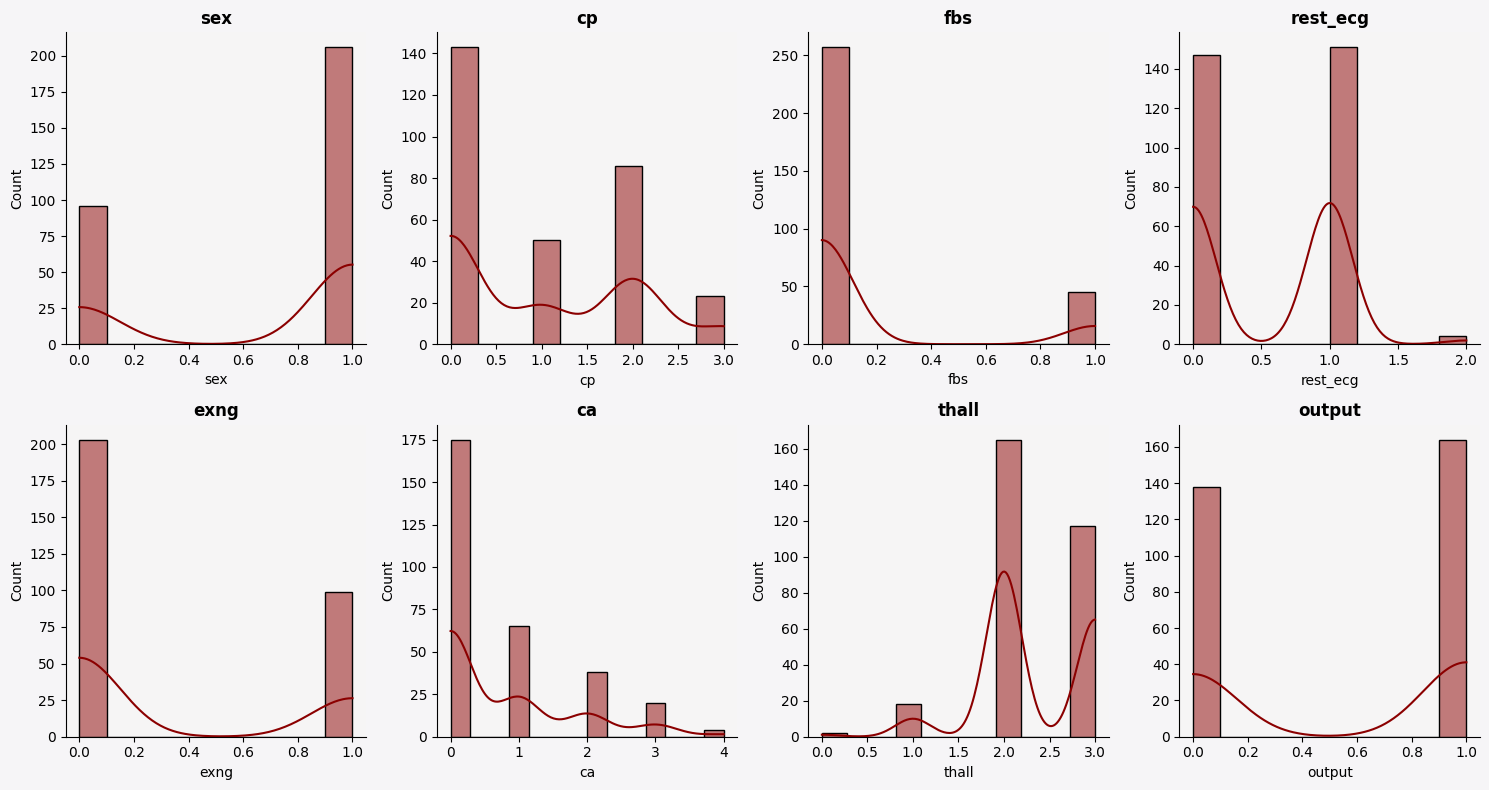

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data_categorical is your DataFrame with 8 categorical features
fig, ax = plt.subplots(2, 4, figsize=(15, 8), facecolor='#f6f5f7')

for i, column in enumerate(data_categorical.columns):
    row = i // 4
    col = i % 4

    plot_ax = ax[row, col]
    sns.histplot(x=data_categorical[column], color='darkred', kde=True, alpha=0.5, ax=plot_ax)

    plot_ax.set_title(column, fontweight='bold')
    plot_ax.set_facecolor('#f6f5f5')

    for spine in ["top", "right"]:
        plot_ax.spines[spine].set_visible(False)

# If there are fewer than 8 features, make the empty subplots invisible
for i in range(len(data_categorical.columns), 8):
    row = i // 4
    col = i % 4
    ax[row, col].axis('off')

plt.tight_layout()
plt.show()


In [127]:
s_k=[]
for i in data_categorical.columns:
    s_k.append([i,data_categorical[i].skew(),data_categorical[i].kurt()])
skew_kurt=pd.DataFrame(s_k,columns=['Columns','Skewness','Kurtosis'])
skew_kurt

,Columns,Skewness,Kurtosis
0,sex,-0.786120,-1.391273
1,cp,0.493022,-1.183729
2,fbs,1.981201,1.937947
3,rest_ecg,0.169467,-1.359464
4,exng,0.737281,-1.466170
5,ca,1.295738,0.781003
6,thall,-0.481232,0.295855
7,output,-0.173691,-1.983008


### Analyis of Categorical Variables with Target


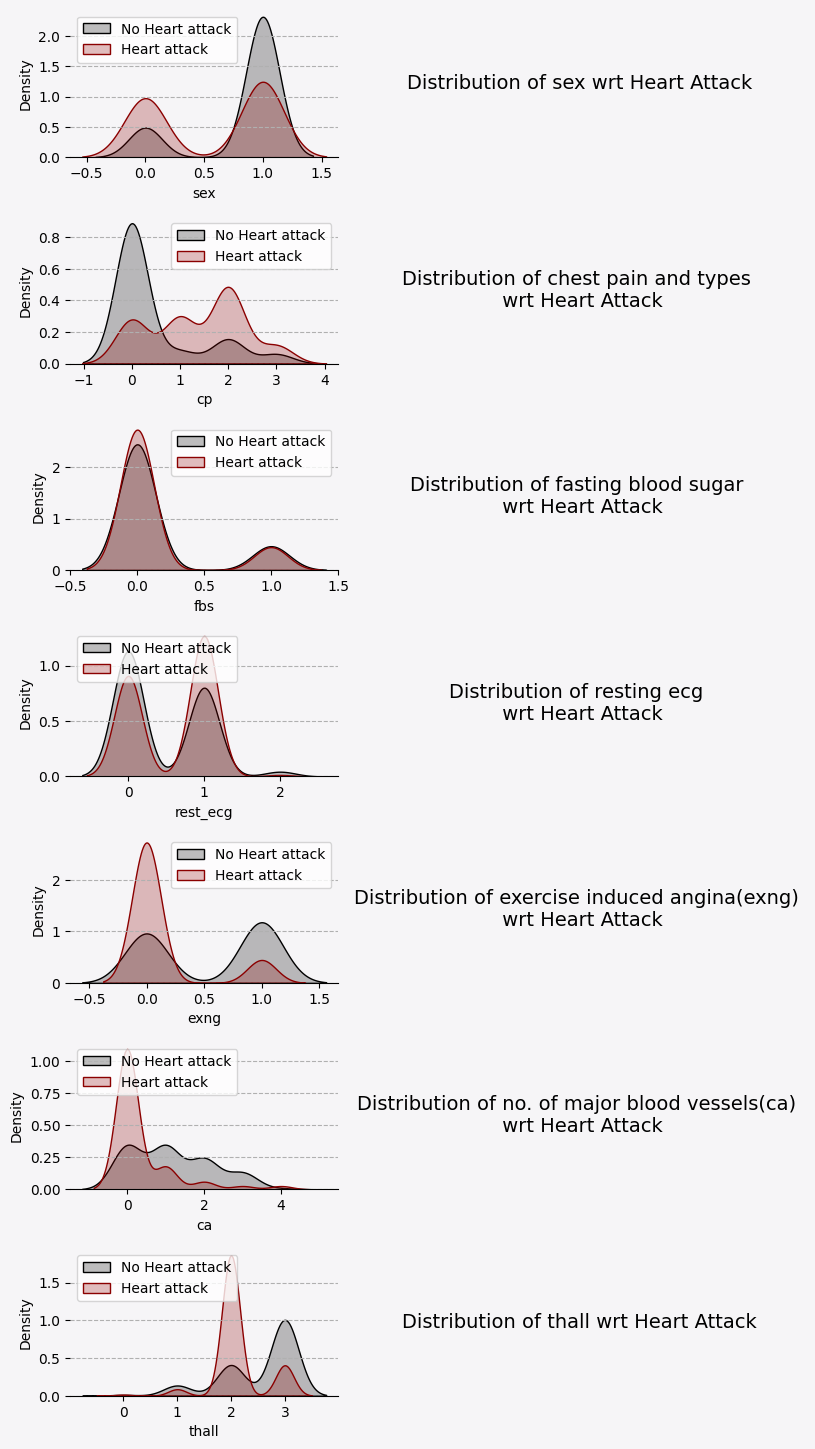

In [128]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(7,4)
gs.update(wspace=0.4, hspace=0.4)
# adding figures
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])
ax10 = fig.add_subplot(gs[5,0])
ax11 = fig.add_subplot(gs[5,1])
ax12 = fig.add_subplot(gs[6,0])
ax13 = fig.add_subplot(gs[6,1])

axes=[ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13]
# data_categorical = data[['sex','cp','fbs','rest_ecg','exng','ca','thall','output']]
background_color = '#f6f5f7'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color) 

#ax0
sns.kdeplot(ax=ax0,x=heart_data.loc[heart_data['output']==0]['sex'],color='black',label='No Heart attack',shade=True)
sns.kdeplot(ax=ax0,x=heart_data.loc[heart_data['output']==1]['sex'],color='darkred',label='Heart attack',shade=True)
ax0.legend(loc = 'upper left')
ax0.grid(linestyle='--', axis='y')
#ax1
ax1.text(0.5,0.5,'Distribution of sex wrt Heart Attack',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 14)

#ax2
sns.kdeplot(ax=ax2,x=heart_data.loc[heart_data['output']==0]['cp'],color='black',label='No Heart attack',shade=True)
sns.kdeplot(ax=ax2,x=heart_data.loc[heart_data['output']==1]['cp'],color='darkred',label='Heart attack',shade=True)
ax2.legend(loc = 'upper right')
ax2.grid(linestyle='--', axis='y')
#ax3
ax3.text(0.5,0.5,'Distribution of chest pain and types \n wrt Heart Attack',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 14)

#ax4
sns.kdeplot(ax=ax4,x=heart_data.loc[heart_data['output']==0]['fbs'],color='black',label='No Heart attack',shade=True)
sns.kdeplot(ax=ax4,x=heart_data.loc[heart_data['output']==1]['fbs'],color='darkred',label='Heart attack',shade=True)
ax4.legend(loc = 'upper right')
ax4.grid(linestyle='--', axis='y')
#ax5
ax5.text(0.5,0.5,'Distribution of fasting blood sugar \n wrt Heart Attack',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 14)

#ax6
sns.kdeplot(ax=ax6,x=heart_data.loc[heart_data['output']==0]['rest_ecg'],color='black',label='No Heart attack',shade=True)
sns.kdeplot(ax=ax6,x=heart_data.loc[heart_data['output']==1]['rest_ecg'],color='darkred',label='Heart attack',shade=True)
ax6.legend(loc = 'upper left')
ax6.grid(linestyle='--', axis='y')
#ax7
ax7.text(0.5,0.5,'Distribution of resting ecg \n wrt Heart Attack',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 14)

#ax8
sns.kdeplot(ax=ax8,x=heart_data.loc[heart_data['output']==0]['exng'],color='black',label='No Heart attack',shade=True)
sns.kdeplot(ax=ax8,x=heart_data.loc[heart_data['output']==1]['exng'],color='darkred',label='Heart attack',shade=True)
ax8.legend(loc = 'upper right')
ax8.grid(linestyle='--', axis='y')
#ax9
ax9.text(0.5,0.5,'Distribution of exercise induced angina(exng) \n wrt Heart Attack',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 14)

#ax10
sns.kdeplot(ax=ax10,x=heart_data.loc[heart_data['output']==0]['ca'],color='black',label='No Heart attack',shade=True)
sns.kdeplot(ax=ax10,x=heart_data.loc[heart_data['output']==1]['ca'],color='darkred',label='Heart attack',shade=True)
ax10.legend(loc = 'upper left')
ax10.grid(linestyle='--', axis='y')
#ax11
ax11.text(0.5,0.5,'Distribution of no. of major blood vessels(ca) \n wrt Heart Attack',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 14)

#ax12
sns.kdeplot(ax=ax12,x=heart_data.loc[heart_data['output']==0]['thall'],color='black',label='No Heart attack',shade=True)
sns.kdeplot(ax=ax12,x=heart_data.loc[heart_data['output']==1]['thall'],color='darkred',label='Heart attack',shade=True)
ax12.legend(loc = 'upper left')
ax12.grid(linestyle='--', axis='y')
#ax13
ax13.text(0.5,0.5,'Distribution of thall wrt Heart Attack',horizontalalignment = 'center',verticalalignment = 'center',fontsize = 14)


# removing labels
axes1=[ax1,ax3,ax5,ax7,ax9,ax11,ax13]
for i in axes1:
    i.spines["bottom"].set_visible(False)
    i.spines["left"].set_visible(False)
    i.set_xlabel("")
    i.set_ylabel("")
    i.set_xticklabels([])
    i.set_yticklabels([])
    i.tick_params(left=False, bottom=False)
    
# removing spines of figures
for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)
    ax10.spines[i].set_visible(False)
    ax11.spines[i].set_visible(False)
    ax12.spines[i].set_visible(False)
    ax13.spines[i].set_visible(False)
    

### Data Pre-processing

Feature Importances:
age         0.072884
sex         0.057186
cp          0.134337
trtbps      0.061660
chol        0.058490
fbs         0.019340
rest_ecg    0.034111
thalach     0.086516
exng        0.102950
oldpeak     0.085883
slp         0.068497
ca          0.124531
thall       0.093614
dtype: float64


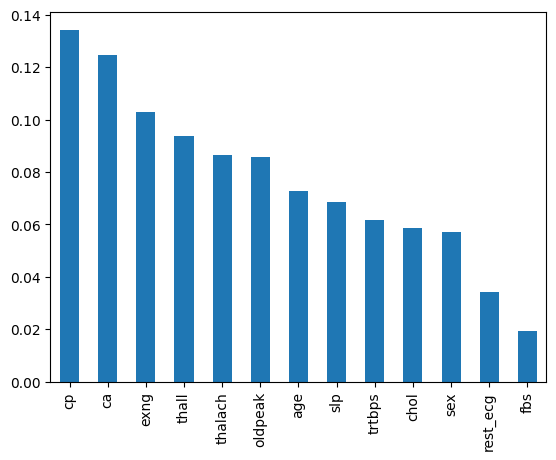

In [129]:
# Split data into features and target
X = heart_data.iloc[:, 0:13]
y = heart_data['output']

# Feature importance analysis
model = ExtraTreesClassifier()
model.fit(X, y)
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print("Feature Importances:")
print(feature_importances)
feature_importances.nlargest(13).plot.bar()
plt.show()

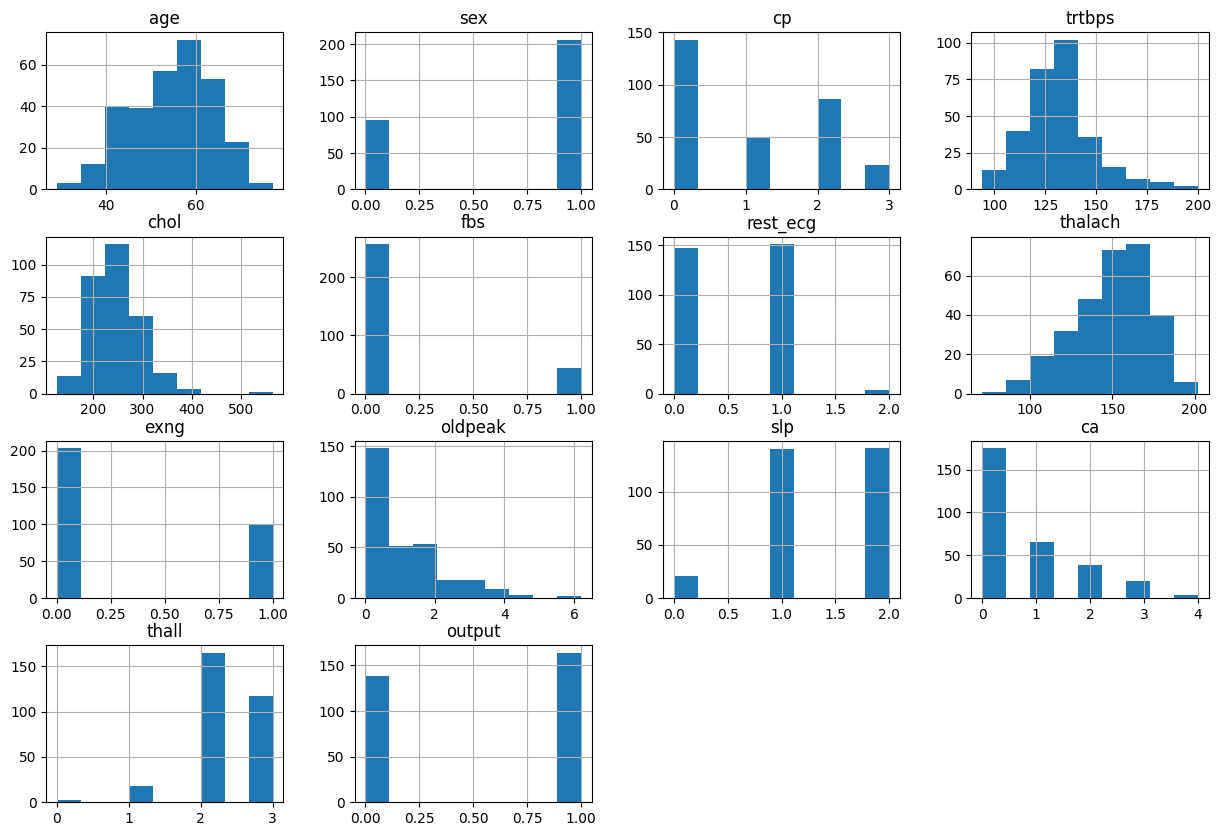

In [130]:
# Histogram of dataset
heart_data.hist(figsize=(15, 10), bins=9)
plt.show()


In [131]:
# Data preparation for model
feature_columns = ['age', 'sex', 'cp', 'chol', 'thalach', 'exng', 'oldpeak', 'slp', 'ca', 'thall']
X = heart_data[feature_columns].values
y = heart_data['output'].values

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print('Train set:', X_train.shape, Y_train.shape)
print('Test set:', X_test.shape, Y_test.shape)

# Standardize the features
# X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


Train set: (241, 10) (241,)
Test set: (61, 10) (61,)


### Training and Prediction

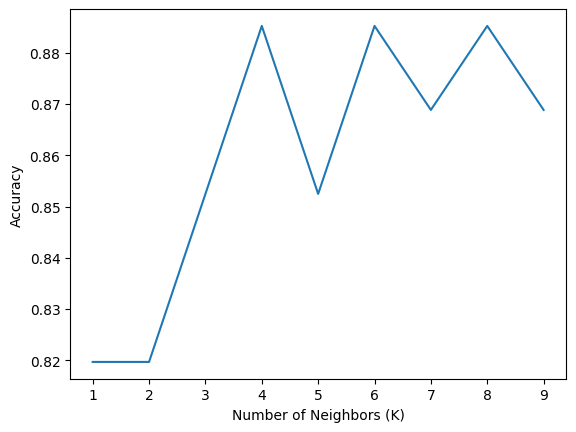

Best K: 4
Accuracy with K= 4 : 0.8852459016393442


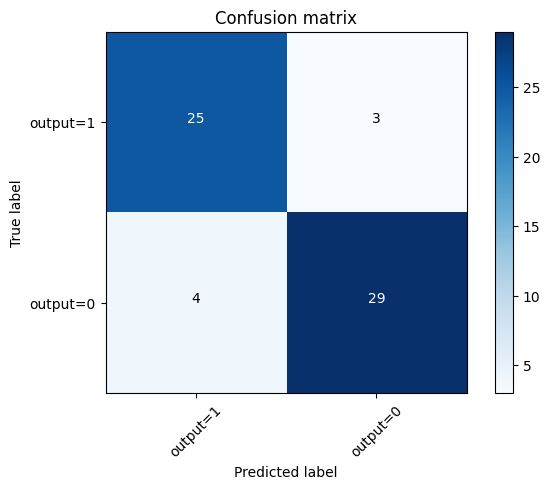

In [132]:
# KNN Classifier
max_k = 10
accuracies = np.zeros(max_k - 1)

# Find optimal K
for k in range(1, max_k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    accuracies[k - 1] = metrics.accuracy_score(Y_test, y_pred)

# Plot accuracies for different values of K
plt.plot(range(1, max_k), accuracies)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.show()

# Best K
best_k = accuracies.argmax() + 1
print(f"Best K: {best_k}")

# Retrain with best K
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, Y_train)

# Predictions and Evaluation
y_pred = knn_best.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, y_pred)
print("Accuracy with K=", best_k, ":", accuracy)

# Confusion Matrix
cnf_matrix = confusion_matrix(Y_test, y_pred, labels=[1, 0])

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['output=1', 'output=0'], normalize=False, title='Confusion matrix')
plt.show()

In [154]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
# print('\nPipeline and GridSearchCV for fitting K-NN model\n')
# Create a pipeline
pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier())

# Create the parameter grid
param_grid = [{
    'kneighborsclassifier__n_neighbors': [4, 5, 6, 7, 8],
    'kneighborsclassifier__p': [1, 2],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}]

#Create a grid search instance
gs = GridSearchCV(pipeline, param_grid = param_grid,
                  scoring='accuracy',
                  refit=True,
                  cv=10,
                  verbose=1,
                  n_jobs=2)

# print('Fit the most optimal model\n')
gs.fit(X_train, Y_train)

print('Print the best model parameters and scores')
print('Best Score: %.3f' % gs.best_score_, '\nBest Parameters: ', gs.best_params_)

print('\nmodel score for test data')
print('Score: %.3f' % gs.score(X_test, Y_test))

y_pred2 = gs.predict(X_test)
print('accuracy =', metrics.accuracy_score(Y_test, y_pred2))

print(classification_report(Y_test, y_pred2))



Fitting 10 folds for each of 80 candidates, totalling 800 fits
Print the best model parameters and scores
Best Score: 0.826 
Best Parameters:  {'kneighborsclassifier__algorithm': 'auto', 'kneighborsclassifier__n_neighbors': 7, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'uniform'}

model score for test data
Score: 0.869
accuracy = 0.8688524590163934
              precision    recall  f1-score   support

           0       1.00      0.76      0.86        33
           1       0.78      1.00      0.88        28

    accuracy                           0.87        61
   macro avg       0.89      0.88      0.87        61
weighted avg       0.90      0.87      0.87        61



Accuracy: 0.8524590163934426


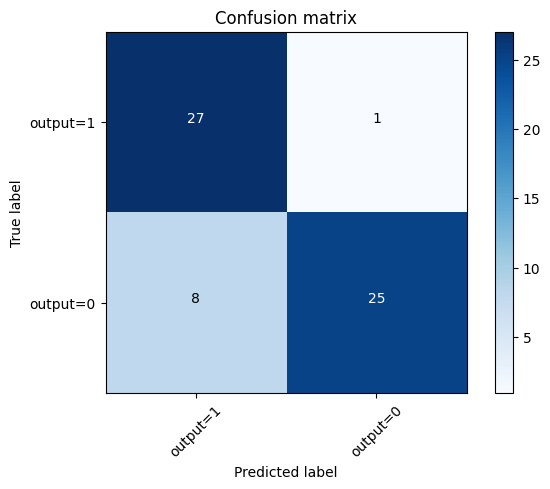

In [133]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Train model
logreg = LogisticRegression(random_state = 0, solver='liblinear', multi_class='auto', penalty='l2')
logreg.fit(X_train, Y_train)

# Predictions and Evaluation
y_pred = logreg.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cnf_matrix = confusion_matrix(Y_test, y_pred, labels=[1, 0])

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['output=1', 'output=0'], normalize=False, title='Confusion matrix')
plt.show()


In [134]:
# Logistic Regression with Cross Validation

logreg = LogisticRegression()
scores = cross_val_score(logreg, X_train, Y_train, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())


[0.88       0.83333333 0.79166667 0.75       0.79166667 0.83333333
 0.875      0.83333333 0.875      0.83333333]
0.8296666666666667


In [135]:
# Logistic Regression with Grid Search

lr=LogisticRegression(n_jobs=-1, random_state=22)
param_grid = {'C': [0.0001, 0.001, 0.01], 'penalty': ['l2']}
grid = GridSearchCV(lr, param_grid, refit = True, verbose = 3)
grid.fit(X_train, Y_train)
grid.best_params_
grid_predictions = grid.predict(X_test)
print(classification_report(Y_test, grid_predictions))


Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ..............C=0.0001, penalty=l2;, score=0.571 total time=   0.3s
[CV 2/5] END ..............C=0.0001, penalty=l2;, score=0.562 total time=   1.0s
[CV 3/5] END ..............C=0.0001, penalty=l2;, score=0.562 total time=   0.0s
[CV 4/5] END ..............C=0.0001, penalty=l2;, score=0.562 total time=   1.2s
[CV 5/5] END ..............C=0.0001, penalty=l2;, score=0.562 total time=   0.7s
[CV 1/5] END ...............C=0.001, penalty=l2;, score=0.633 total time=   0.6s
[CV 2/5] END ...............C=0.001, penalty=l2;, score=0.604 total time=   0.7s
[CV 3/5] END ...............C=0.001, penalty=l2;, score=0.625 total time=   0.0s
[CV 4/5] END ...............C=0.001, penalty=l2;, score=0.646 total time=   0.6s
[CV 5/5] END ...............C=0.001, penalty=l2;, score=0.583 total time=   0.6s
[CV 1/5] END ................C=0.01, penalty=l2;, score=0.857 total time=   0.6s
[CV 2/5] END ................C=0.01, penalty=l2;,

In [136]:
from sklearn.linear_model import Perceptron

# Assuming X and y are your feature matrix and labels
model = Perceptron()
model.fit(X, y)

# Check if the model converged
if model.score(X, y) == 1.0:
    print("Data is linearly separable.")
else:
    print("Data is not linearly separable.")


Data is not linearly separable.


Accuracy: 0.8688524590163934


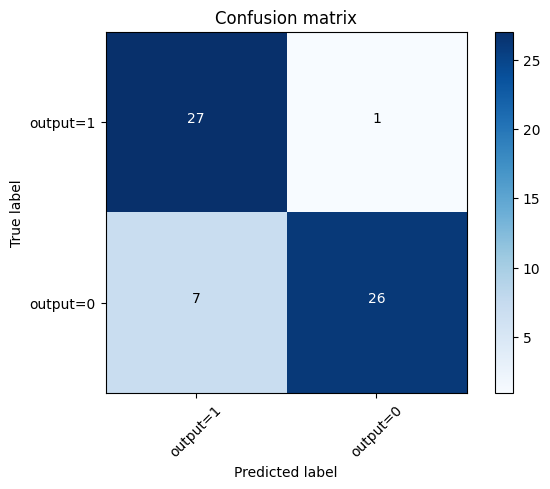

In [137]:
# SVM Classifier

# Train model
svm_model = svm.SVC(kernel='rbf', gamma = 0.1)
svm_model.fit(X_train, Y_train)

# Predictions and Evaluation
y_pred = svm_model.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cnf_matrix = confusion_matrix(Y_test, y_pred, labels=[1, 0])

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['output=1', 'output=0'], normalize=False, title='Confusion matrix')
plt.show()


cross_val_score
[0.85714286 0.9        0.75      ]
best_parameters {'svc__C': 10.0, 'svc__gamma': 0.004149377593360996}
              precision    recall  f1-score   support

           0       0.96      0.76      0.85        33
           1       0.77      0.96      0.86        28

    accuracy                           0.85        61
   macro avg       0.87      0.86      0.85        61
weighted avg       0.87      0.85      0.85        61



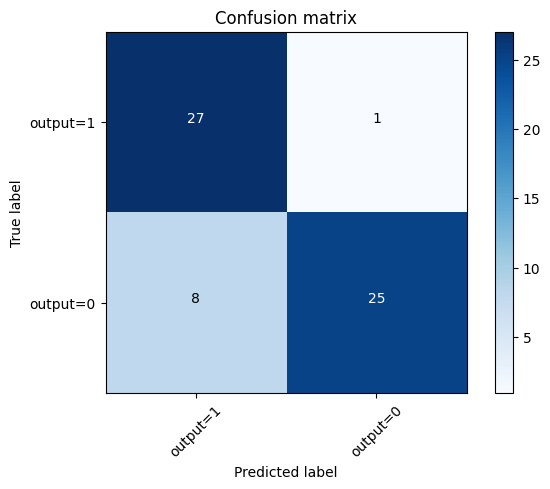

In [138]:
# defining parameter range
from sklearn.model_selection import cross_val_score
print('cross_val_score')
print(cross_val_score(svm_model, X_test, Y_test, cv=3, scoring='accuracy'))

# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC

# param_grid = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1]}
# grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
# grid_search.fit(X, y)

# print("Best parameters:", grid_search.best_params_)


from sklearn.pipeline import make_pipeline
scaled_svc = make_pipeline(StandardScaler(), SVC(kernel='rbf'))
param_grid = {'svc__C': np.logspace(-3, 2, 6,10),
              'svc__gamma': np.logspace(-3, 2, 6,10) / X_train.shape[0]}

grid = GridSearchCV(estimator = scaled_svc, param_grid=param_grid, cv=10, scoring = 'accuracy')
grid.fit(X_train, Y_train)
print('best_parameters', grid.best_params_)

## Prediction
y_pred4=grid.predict(X_test)
print(classification_report(Y_test,y_pred4))
# print(confusion_matrix(Y_test,y_pred4))
# Confusion Matrix
cnf_matrix = confusion_matrix(Y_test, y_pred4, labels=[1, 0])

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['output=1', 'output=0'], normalize=False, title='Confusion matrix')
plt.show()


In [139]:
# svm with grid search cv

cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)
model = SVC()
params_svm = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01]}
gs_svm = GridSearchCV(estimator=model, param_grid=params_svm, cv=cv_method, verbose=3, scoring='accuracy')
gs_svm.fit(X_train,Y_train)
gs_svm.best_params_
y_pred = gs_svm.predict(X_test)
print(classification_report(Y_test, y_pred))


Fitting 15 folds for each of 15 candidates, totalling 225 fits
[CV 1/15] END ...................C=0.1, gamma=1;, score=0.571 total time=   0.0s
[CV 2/15] END ...................C=0.1, gamma=1;, score=0.562 total time=   0.0s
[CV 3/15] END ...................C=0.1, gamma=1;, score=0.562 total time=   0.0s
[CV 4/15] END ...................C=0.1, gamma=1;, score=0.562 total time=   0.0s
[CV 5/15] END ...................C=0.1, gamma=1;, score=0.562 total time=   0.0s
[CV 6/15] END ...................C=0.1, gamma=1;, score=0.571 total time=   0.0s
[CV 7/15] END ...................C=0.1, gamma=1;, score=0.562 total time=   0.0s
[CV 8/15] END ...................C=0.1, gamma=1;, score=0.562 total time=   0.0s
[CV 9/15] END ...................C=0.1, gamma=1;, score=0.562 total time=   0.0s
[CV 10/15] END ..................C=0.1, gamma=1;, score=0.562 total time=   0.0s
[CV 11/15] END ..................C=0.1, gamma=1;, score=0.571 total time=   0.0s
[CV 12/15] END ..................C=0.1, gamma=

Accuracy: 0.8360655737704918


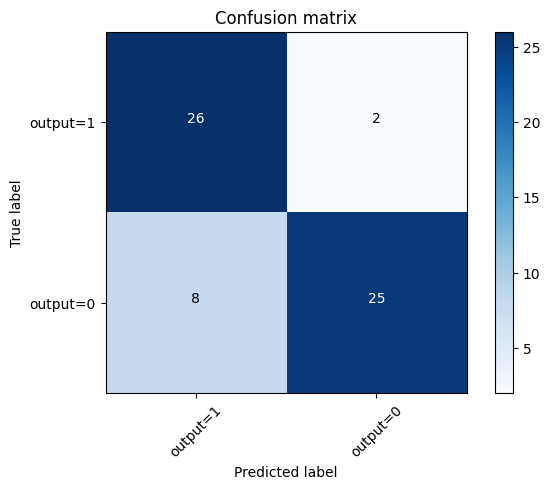

In [140]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Train model
dt = DecisionTreeClassifier(random_state = 2, criterion="entropy", max_depth=4)
dt.fit(X_train, Y_train)

# Predictions and Evaluation
y_pred = dt.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cnf_matrix = confusion_matrix(Y_test, y_pred, labels=[1, 0])

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['output=1', 'output=0'], normalize=False, title='Confusion matrix')
plt.show()

In [141]:
print("\nUsing GridSearchCV & StratifiedShuffleSplit options:\n")
param_grid = {'max_depth':range(1, 7), 'max_leaf_nodes':range(2, 10), 
               'ccp_alpha': np.linspace(0., 0.03, 20)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0),
                    param_grid=param_grid, cv=10)
grid.fit(X_train, Y_train)
scores = pd.DataFrame(grid.cv_results_)

print('\nScores method1:')
print(scores)

print('\nBest params method1:')
print(grid.best_params_)



Using GridSearchCV & StratifiedShuffleSplit options:


Scores method1:
     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.001002      0.000005         0.000700        0.000641   
1         0.001198      0.000556         0.000752        0.000515   
2         0.000804      0.000602         0.000598        0.000488   
3         0.001009      0.000461         0.000335        0.000520   
4         0.000838      0.000435         0.000301        0.000460   
..             ...           ...              ...             ...   
955       0.001100      0.000300         0.000800        0.000871   
956       0.001319      0.000664         0.000300        0.000459   
957       0.001501      0.000922         0.000300        0.000458   
958       0.001200      0.000400         0.000600        0.000490   
959       0.001200      0.000399         0.000300        0.000459   

    param_ccp_alpha param_max_depth param_max_leaf_nodes  \
0               0.0               1    

In [153]:
# Decision Tree Classifier with Grid Search CV

cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)
model = DecisionTreeClassifier()
params_dt = {'max_depth': range(2, 4)}
gs_dt = GridSearchCV(estimator=model, param_grid=params_dt, cv=cv_method, verbose=3, scoring='accuracy')
gs_dt.fit(X_train,Y_train)
gs_dt.best_params_
y_pred = gs_dt.predict(X_test)
print(classification_report(Y_test, y_pred))


Fitting 15 folds for each of 2 candidates, totalling 30 fits
[CV 1/15] END ......................max_depth=2;, score=0.551 total time=   0.0s
[CV 2/15] END ......................max_depth=2;, score=0.708 total time=   0.0s
[CV 3/15] END ......................max_depth=2;, score=0.729 total time=   0.0s
[CV 4/15] END ......................max_depth=2;, score=0.688 total time=   0.0s
[CV 5/15] END ......................max_depth=2;, score=0.750 total time=   0.0s
[CV 6/15] END ......................max_depth=2;, score=0.755 total time=   0.0s
[CV 7/15] END ......................max_depth=2;, score=0.729 total time=   0.0s
[CV 8/15] END ......................max_depth=2;, score=0.792 total time=   0.0s
[CV 9/15] END ......................max_depth=2;, score=0.771 total time=   0.0s
[CV 10/15] END .....................max_depth=2;, score=0.729 total time=   0.0s
[CV 11/15] END .....................max_depth=2;, score=0.673 total time=   0.0s
[CV 12/15] END .....................max_depth=2;

Accuracy: 0.8852459016393442


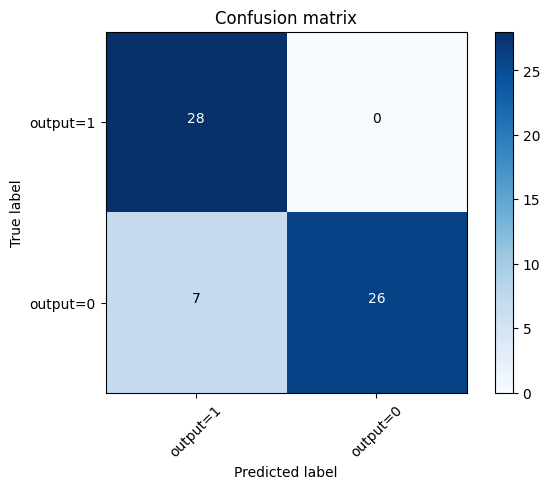

In [143]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Train model
rf = RandomForestClassifier(random_state=1, n_estimators=100)
rf.fit(X_train, Y_train)

# Predictions and Evaluation
y_pred = rf.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cnf_matrix = confusion_matrix(Y_test, y_pred, labels=[1, 0])

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['output=1', 'output=0'], normalize=False, title='Confusion matrix')
plt.show()


In [146]:
print('\nGridSearchCV\n')
params = {"max_depth": [5, 8,10, 15, None],
             "max_features": [2,3,5],
             "min_samples_split": [2, 8,12, 15, 20],
             "n_estimators": [50,100, 150, 200]}

gs = GridSearchCV(rf,params,cv=7,n_jobs=-1)
gs.fit(X_train, Y_train)
print('best params using GridSearchCV:')
print(gs.best_params_)
y_train_pred = gs.predict(X_train)
y_test_pred =  gs.predict(X_test)
test_accuracy_gridcv = accuracy_score(Y_test, y_test_pred)
print(test_accuracy_gridcv)


GridSearchCV

best params using GridSearchCV:
{'max_depth': 5, 'max_features': 2, 'min_samples_split': 8, 'n_estimators': 150}
0.8688524590163934


In [147]:
# Random Forest Classifier

cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)
model = RandomForestClassifier()
params_rf = {'n_estimators': [50, 100, 150, 200], 'max_depth': range(4, 6)}
gs_rf = GridSearchCV(estimator=model, param_grid=params_rf, cv=cv_method, verbose=3, scoring='accuracy')
gs_rf.fit(X_train,Y_train)
gs_rf.best_params_
y_pred = gs_rf.predict(X_test)
print(classification_report(Y_test, y_pred))


Fitting 15 folds for each of 8 candidates, totalling 120 fits
[CV 1/15] END .....max_depth=4, n_estimators=50;, score=0.857 total time=   0.0s
[CV 2/15] END .....max_depth=4, n_estimators=50;, score=0.750 total time=   0.0s
[CV 3/15] END .....max_depth=4, n_estimators=50;, score=0.854 total time=   0.0s
[CV 4/15] END .....max_depth=4, n_estimators=50;, score=0.771 total time=   0.0s
[CV 5/15] END .....max_depth=4, n_estimators=50;, score=0.750 total time=   0.0s
[CV 6/15] END .....max_depth=4, n_estimators=50;, score=0.837 total time=   0.0s
[CV 7/15] END .....max_depth=4, n_estimators=50;, score=0.812 total time=   0.0s
[CV 8/15] END .....max_depth=4, n_estimators=50;, score=0.812 total time=   0.0s
[CV 9/15] END .....max_depth=4, n_estimators=50;, score=0.896 total time=   0.0s
[CV 10/15] END ....max_depth=4, n_estimators=50;, score=0.771 total time=   0.0s
[CV 11/15] END ....max_depth=4, n_estimators=50;, score=0.776 total time=   0.0s
[CV 12/15] END ....max_depth=4, n_estimators=50